In [38]:
documents = []

file = open('Tratando Arquivos/timelines_tratadas/5781452.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 500 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 3
learning_decay = .9
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [41]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [42]:
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: pro racist like left saying
Topic #1: trump think right white liberals
Topic #2: soopermexican saintrph amp jessicaheddings great



In [43]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
0,0.06,0.88,0.06,1
1,0.09,0.09,0.81,2
2,0.17,0.17,0.66,2
3,0.12,0.76,0.12,1
4,0.12,0.13,0.75,2
5,0.06,0.88,0.06,1
6,0.07,0.07,0.86,2
7,0.14,0.12,0.74,2
8,0.12,0.12,0.76,2
9,0.08,0.07,0.86,2


In [44]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,133
1,1,58
2,0,33


In [45]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 2:
        print(documents[i])
    i = i + 1


SooperMexican I believe add Robitussin jolly rancher officially becomes chocolate drank 

SooperMexican Vitamin R included 

SooperMexican Clearly possessed Journey DENY STEVE PERRY AND HIS WORKS 

SaintRPh SooperMexican JessicaHeddings Soop thundercat reference point 

SooperMexican Send BillsMafia tune 

SooperMexican independent thoughts happen change based audience 

I debate TomiLahren live theblaze wrong view pro choice conservative stance An 

SooperMexican That literally business model Hating everybody 

I Maybe SooperMexican I co host show Philosophy Network 

Yes SooperMexican pronounced huh ver Trust Encyclopedia Britannimacalico JessicaHeddings SaintRPh 

good see SooperMexican work work GED time 

I say execrable pestilential amp anathematizing laugh SooperMexican pronunciation amp I urge read th 

SooperMexican ecspecially rather especially 

SooperMexican Of course recently I lived Oklahoma And Texas bad Another 

SooperMexican JessicaHeddings SaintRPh guys best Love lis

In [46]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

c:\users\pc-dell\appdata\local\programs\python\python36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2     -372.142456 -195.243271       1        1  56.888197
1     -437.769562 -443.703552       2        1  26.440638
0     -620.127258 -262.638367       3        1  16.671165, topic_info=     Category       Freq           Term      Total  loglift  logprob
term                                                                
160   Default  41.000000  soopermexican  41.000000  30.0000  30.0000
181   Default   9.000000          trump   9.000000  29.0000  29.0000
142   Default   3.000000         racist   3.000000  28.0000  28.0000
137   Default   3.000000            pro   3.000000  27.0000  27.0000
120   Default   3.000000          obama   3.000000  26.0000  26.0000
89    Default   2.000000           left   2.000000  25.0000  25.0000
151   Default   3.000000         saying   3.000000  24.0000  24.0000
2     Default   3.000000        account   3.000000  23.0000  23.0000
91    Default   3.000000            let   3.000000  22.0000  22.0000
198   Default   3.000000          white   3.000000  21.0000  21.0000
10    Default   3.000000            ask   3.000000  20.0000  20.0000
5     Default   3.000000            alt   3.000000  19.0000  19.0000
193   Default   4.000000          video   4.000000  18.0000  18.0000
175   Default   3.000000          think   3.000000  17.0000  17.0000
111   Default   3.000000         minute   3.000000  16.0000  16.0000
75    Default   3.000000        hillary   3.000000  15.0000  15.0000
0     Default   3.000000             12   3.000000  14.0000  14.0000
141   Default   3.000000          putin   3.000000  13.0000  13.0000
32    Default   3.000000            cnn   3.000000  12.0000  12.0000
83    Default   3.000000           jobs   3.000000  11.0000  11.0000
169   Default   3.000000         tapper   3.000000  10.0000  10.0000
152   Default   3.000000           says   3.000000   9.0000   9.0000
42    Default   3.000000      defending   3.000000   8.0000   8.0000
201   Default   3.000000          woman   3.000000   7.0000   7.0000
1     Default   3.000000             20   3.000000   6.0000   6.0000
136   Default   3.000000      president   3.000000   5.0000   5.0000
123   Default   3.000000             oh   3.000000   4.0000   4.0000
9     Default   2.000000            art   2.000000   3.0000   3.0000
110   Default   3.000000           mike   3.000000   2.0000   2.0000
166   Default   3.000000          super   3.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
201    Topic3   0.910501          woman   3.312602   0.5000  -4.9654
1      Topic3   0.869612             20   3.166850   0.4990  -5.0114
166    Topic3   0.852618          super   3.133550   0.4899  -5.0311
84     Topic3   0.711831           just   2.641036   0.4804  -5.2116
189    Topic3   0.800106            ugh   2.993891   0.4719  -5.0947
123    Topic3   0.877234             oh   3.292516   0.4689  -5.0026
59     Topic3   0.818703          going   3.099562   0.4602  -5.0717
20     Topic3   0.801764     billsmafia   3.077114   0.4466  -5.0926
75     Topic3   0.946704        hillary   3.640902   0.4445  -4.9264
14     Topic3   0.829290           beer   3.201762   0.4406  -5.0588
42     Topic3   0.784266      defending   3.033804   0.4387  -5.1147
110    Topic3   0.791236           mike   3.094415   0.4277  -5.1058
8      Topic3   0.723957           anti   2.889615   0.4073  -5.1947
124    Topic3   0.809449           open   3.256518   0.3994  -5.0830
154    Topic3   0.784197    seanhannity   3.225822   0.3772  -5.1147
195    Topic3   0.702106         voting   2.895927   0.3745  -5.2253
48     Topic3   0.782577           evil   3.244143   0.3695  -5.1168
167    Topic3   0.671305           sure   2.803348   0.3621  -5.2702
61     Topic3   0.721083            gop   3.013105   0.3615  -5.1986
159    Topic3   0.886982           soop   3.716107   0.3589  -4.9916
73     Top

Text(0.5,1,'Segregation of Topic Clusters')

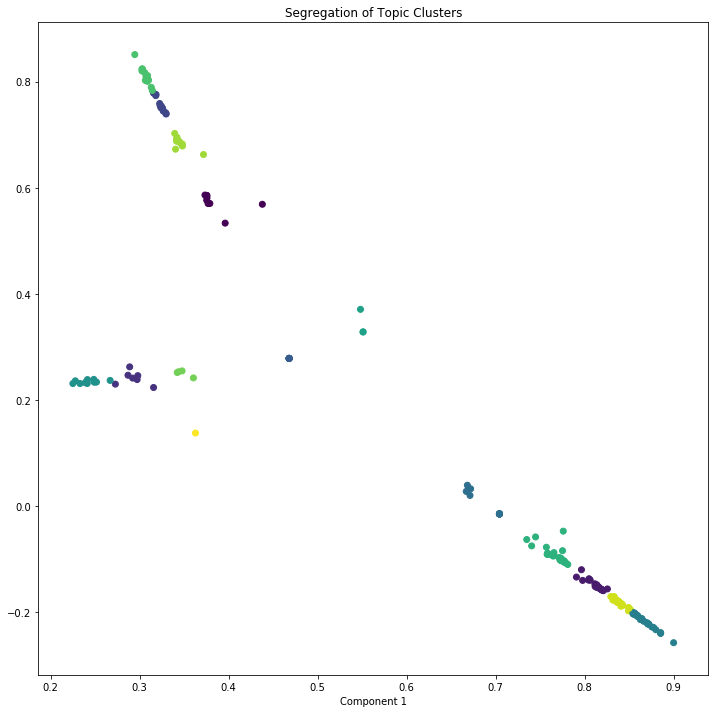

In [47]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )